<a href="https://colab.research.google.com/github/karkiayush/zomato_dataset_eda/blob/master/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("zomato.csv", encoding="latin-1")
df.head()
df_country = pd.read_excel("Country-Code.xlsx")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df_country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [5]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [7]:
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [8]:
"""cusines have 9 missing values"""

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [9]:
"""Finding whether there is any duplicate value or not"""

count = df.duplicated().sum()
print(f"Duplicate value: {count}")
df.duplicated()

Duplicate value: 0


0       False
1       False
2       False
3       False
4       False
        ...  
9546    False
9547    False
9548    False
9549    False
9550    False
Length: 9551, dtype: bool

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

## **Types of columns**

## 1. Numerical columns

#### 1a. Integer cols

- Restaurant ID
- Country Code
- Average Cost for two
- Price range
- Votes

#### 1b. Float cols

- Longitude
- Latitude
- Aggregate rating

## 2. Categorical Columns

- Restaurant Name
- City
- Address
- Locality
- Locality Verbose
- Cuisines
- Currency
- Has Table booking
- Has Online delivery
- Is delivering now
- Switch to order menu
- Rating color
- Rating text


<Axes: >

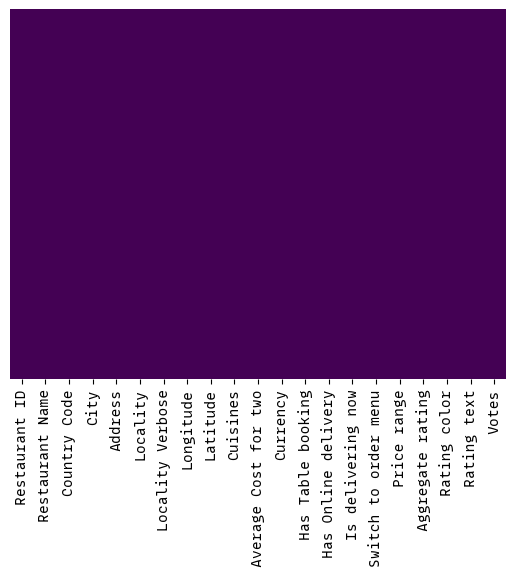

In [11]:
"""Here we are passing the result of df.isnull() and make the yticklabels as false as we don't want the y tick labels"""

plt.rcParams["font.family"] = "Monolisa Trial"


sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [12]:
final_df = pd.merge(df, df_country, on="Country Code", how="left")
final_df.to_csv("zomato_final.csv", index=True)


final_df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines


### **Finding the countries which uses zomato most and least**


In [13]:
popularity_countrywise = final_df["Country"].value_counts()
popularity_countrywise

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64

In [14]:
# Makes the country name and its count as column and makes the s.n as index value.
# By default, country will be index
popularity_countrywise = popularity_countrywise.reset_index()
print(popularity_countrywise["count"].sum())
popularity_countrywise

9551


,Country,count
0,India,8652
1,United States,434
2,United Kingdom,80
3,Brazil,60
4,UAE,60
5,South Africa,60
6,New Zealand,40
7,Turkey,34
8,Australia,24
9,Phillipines,22


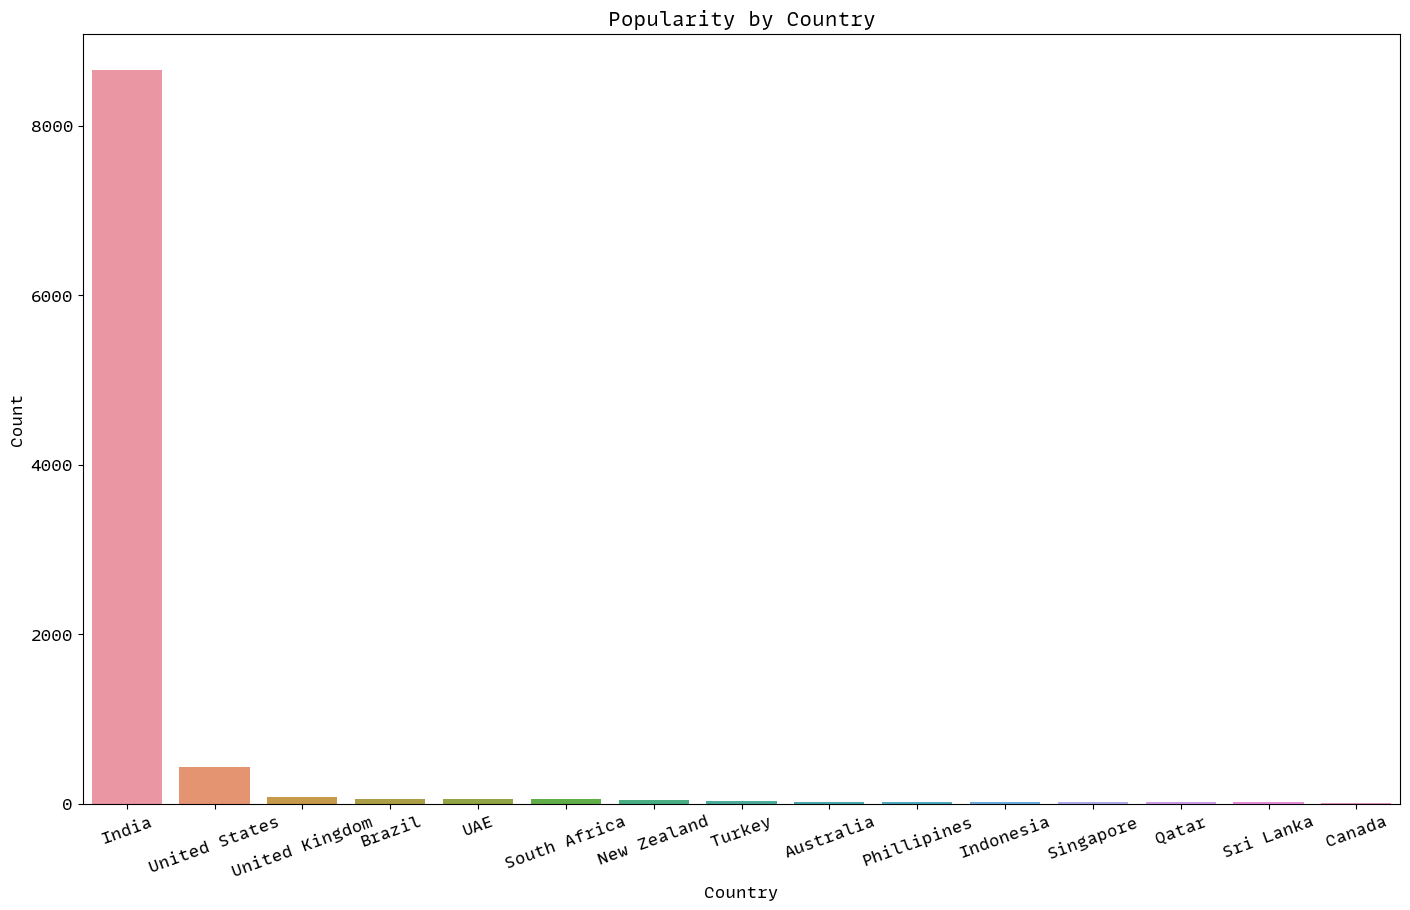

In [15]:
plt.rcParams["font.size"] = 12
plt.figure(figsize=(17, 10))  # Adjust size as needed
sns.barplot(data=popularity_countrywise, x="Country", y="count")
plt.xticks(rotation=20)  # Rotate x-axis labels for better visibility
plt.title("Popularity by Country")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()

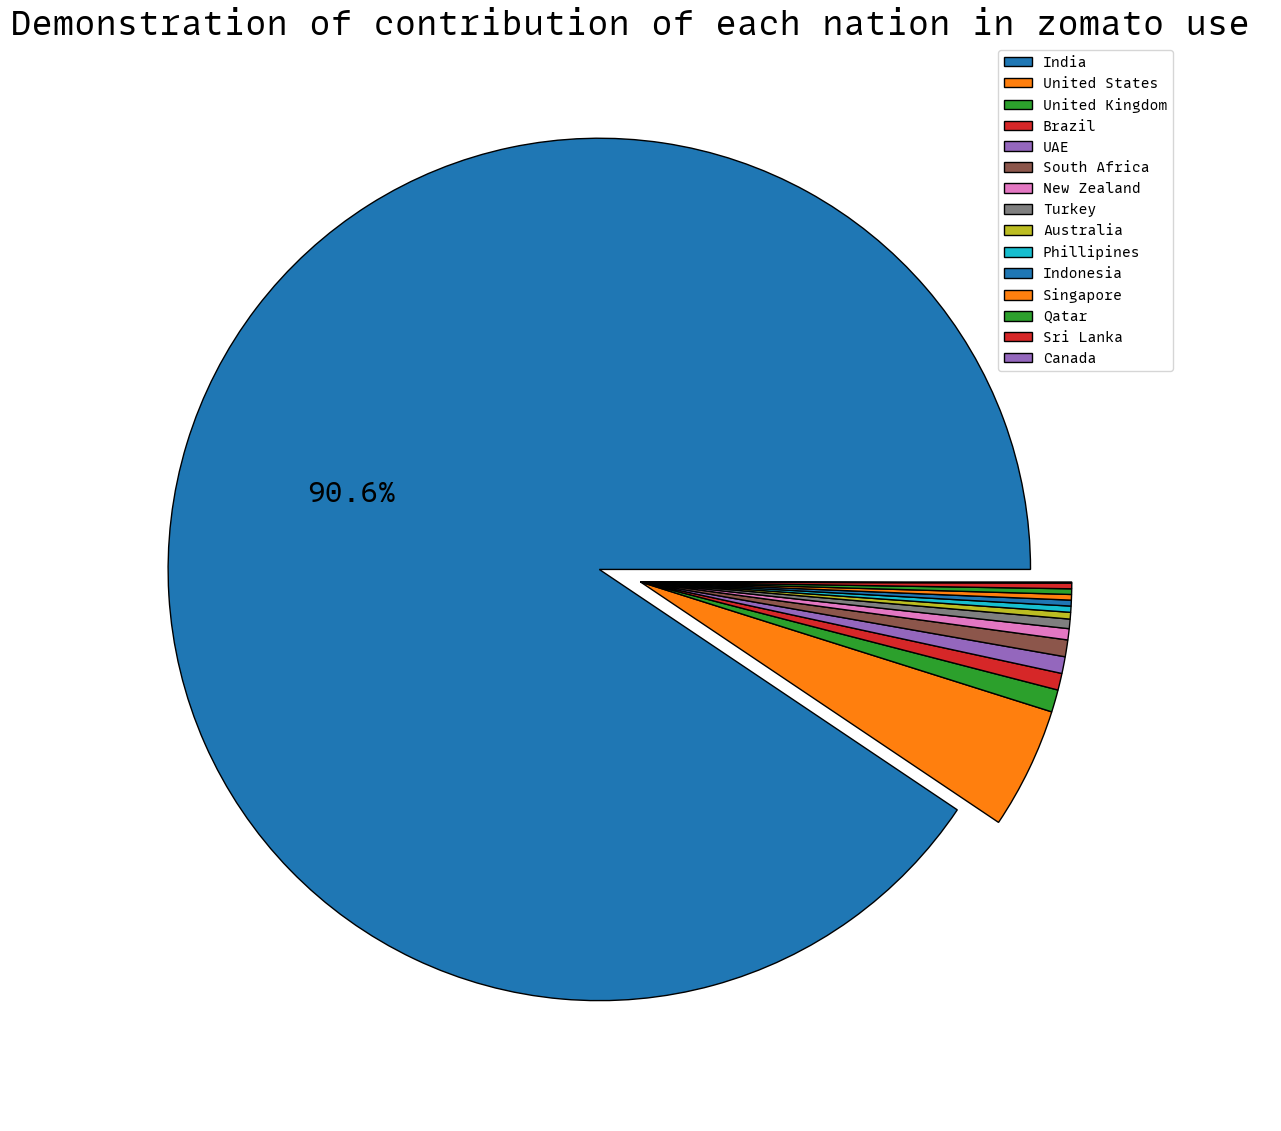

In [16]:
# Calculate explode list
plt.rcParams["font.size"] = 20
explode = [
    0.1 if count == popularity_countrywise["count"].max() else 0
    for count in popularity_countrywise["count"]
]

# Plotting
plt.figure(figsize=(15, 14))
wedges, _, autotexts = plt.pie(
    x=popularity_countrywise["count"],
    explode=explode,
    autopct="",
    wedgeprops={"edgecolor": "black"},
)
plt.legend(popularity_countrywise["Country"], loc="upper right", fontsize=10)

# Find the index of the largest wedge
largest_wedge_index = np.argmax(popularity_countrywise["count"])

# Set autopct format only for the largest wedge
autotexts[largest_wedge_index].set_text(
    "{:.1f}%".format(
        popularity_countrywise["count"][largest_wedge_index]
        * (100 / popularity_countrywise["count"].sum())
    )
)
plt.title("Demonstration of contribution of each nation in zomato use ")
plt.show()

- This observation shows that India mostly uses zomato for online food odering as compared to other nations

- Canada uses zomato least in comparison, almost in negligible amount

- Hence zomato maximum transaction are from India


# Deriving some relationships


In [17]:
final_df["Aggregate rating"]

0       4.8
1       4.5
2       4.4
3       4.9
4       4.8
       ... 
9546    4.1
9547    4.2
9548    3.7
9549    4.0
9550    4.0
Name: Aggregate rating, Length: 9551, dtype: float64

In [18]:
final_df_countrywise = final_df.groupby("Country")
avg_aggregate_rating_countrywise = final_df_countrywise["Aggregate rating"].mean()
avg_aggregate_rating_countrywise = avg_aggregate_rating_countrywise.reset_index()
avg_aggregate_rating_countrywise

,Country,Aggregate rating
0,Australia,3.658333
1,Brazil,3.763333
2,Canada,3.575000
3,India,2.523324
4,Indonesia,4.295238
5,New Zealand,4.262500
6,Phillipines,4.468182
7,Qatar,4.060000
8,Singapore,3.575000
9,South Africa,4.210000


<Axes: xlabel='Country', ylabel='Aggregate rating'>

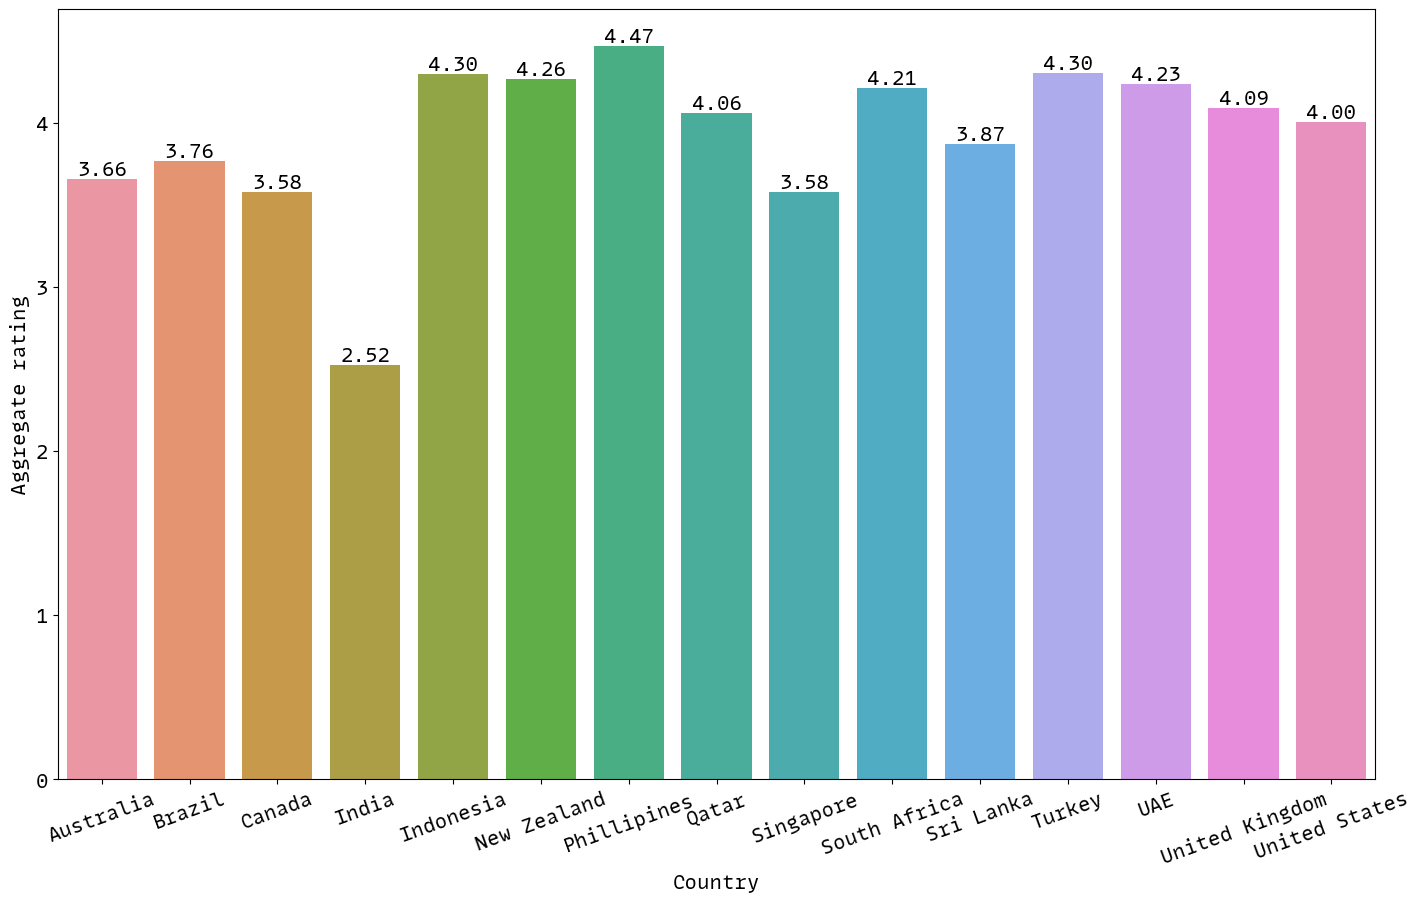

In [19]:
plt.rcParams["font.size"] = 14
plt.figure(figsize=(17, 10))
for index, row in avg_aggregate_rating_countrywise.iterrows():
    plt.text(
        index,
        row["Aggregate rating"],
        f"{row['Aggregate rating']:.2f}",
        ha="center",
        va="bottom",
    )

plt.xticks(rotation=20)
sns.barplot(data=avg_aggregate_rating_countrywise, x="Country", y="Aggregate rating")

- This analysis shows the average aggragate rating provided by each nation to zomato.
- Suprisingly, though zomato did its most of its transaction in India, the average aggragate rating is very poor in India which is 2.52. Hence it is the point of concern for zomato to improve it's serivce in India, if they have to sustain well
- Highest average aggragate rating is in Philippines, which is 4.47


# Working on finding the type of rating given by people


In [20]:
final_df

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,NamlÛ± Gurme,208,ï¿½ï¿½stanbul,"Kemankeï¿½ï¿½ Karamustafa Paï¿½ï¿½a Mahallesi,...",Karakï¿½_y,"Karakï¿½_y, ï¿½ï¿½stanbul",28.977392,41.022793,Turkish,...,No,No,No,No,3,4.1,Green,Very Good,788,Turkey
9547,5908749,Ceviz Aï¿½ï¿½acÛ±,208,ï¿½ï¿½stanbul,"Koï¿½ï¿½uyolu Mahallesi, Muhittin ï¿½ï¿½stï¿½_...",Koï¿½ï¿½uyolu,"Koï¿½ï¿½uyolu, ï¿½ï¿½stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",...,No,No,No,No,3,4.2,Green,Very Good,1034,Turkey
9548,5915807,Huqqa,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.034640,41.055817,"Italian, World Cuisine",...,No,No,No,No,4,3.7,Yellow,Good,661,Turkey
9549,5916112,Aï¿½ï¿½ï¿½k Kahve,208,ï¿½ï¿½stanbul,"Kuruï¿½_eï¿½ï¿½me Mahallesi, Muallim Naci Cadd...",Kuruï¿½_eï¿½ï¿½me,"Kuruï¿½_eï¿½ï¿½me, ï¿½ï¿½stanbul",29.036019,41.057979,Restaurant Cafe,...,No,No,No,No,4,4.0,Green,Very Good,901,Turkey


In [21]:
rating = (
    final_df.groupby(["Aggregate rating", "Rating color", "Rating text"])
    .size()
    .reset_index()
)
rating = rating.rename(columns={0: "Total Rating Count"})
rating

,Aggregate rating,Rating color,Rating text,Total Rating Count
0,0.0,White,Not rated,2148
1,1.8,Red,Poor,1
2,1.9,Red,Poor,2
3,2.0,Red,Poor,7
4,2.1,Red,Poor,15
5,2.2,Red,Poor,27
6,2.3,Red,Poor,47
7,2.4,Red,Poor,87
8,2.5,Orange,Average,110
9,2.6,Orange,Average,191


In [22]:
rating["Total Rating Count"].sum()

9551

<Axes: xlabel='Aggregate rating', ylabel='Total Rating Count'>

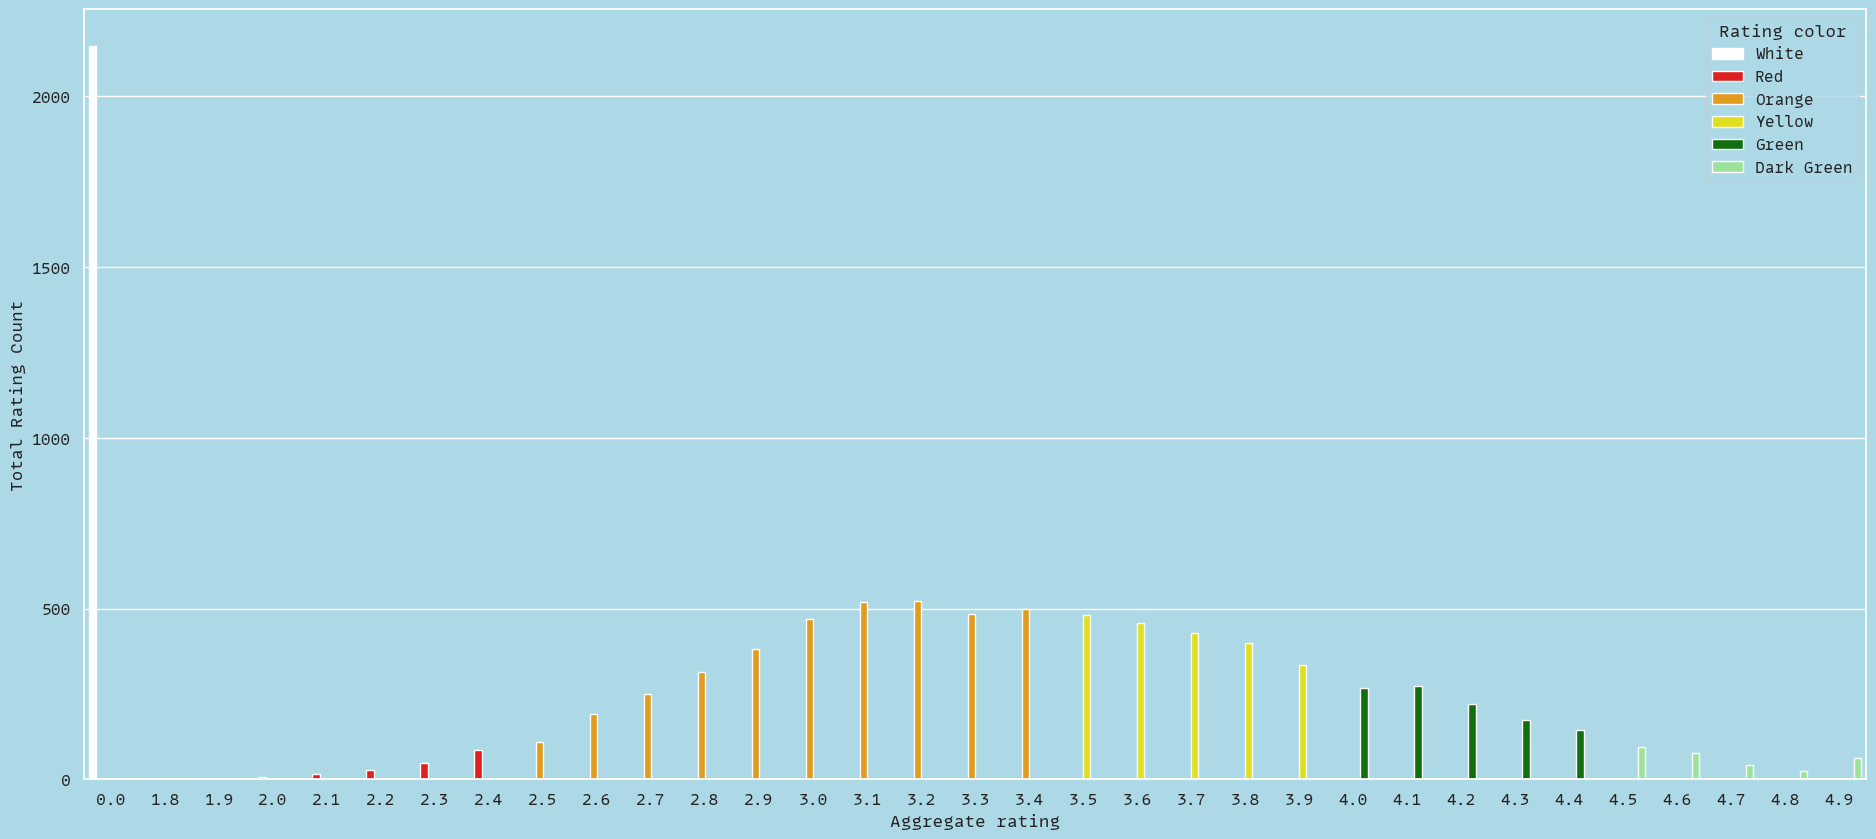

In [29]:
"""
0.0: not rated
1.8 to 2.4: poor rating
2.5 to 3.4: average rating
3.5 to 3.9: good rating
4 to 4.4: very good rating
4.5 to 4.9: Excellent rating
"""

plt.figure(figsize=(23, 10))
sns.set(rc={"axes.facecolor": "lightblue", "figure.facecolor": "lightblue"})
plt.rcParams["font.family"] = "Monolisa Trial"
sns.barplot(
    data=rating,
    x="Aggregate rating",
    y="Total Rating Count",
    hue="Rating color",
    palette=["white", "red", "orange", "yellow", "green", "lightgreen"],
)

In [30]:
rating_types_count = rating.groupby("Rating text")["Total Rating Count"].sum()
rating_types_count = rating_types_count.reset_index()
rating_types_count

,Rating text,Total Rating Count
0,Average,3737
1,Excellent,301
2,Good,2100
3,Not rated,2148
4,Poor,186
5,Very Good,1079


<Axes: xlabel='Rating text', ylabel='Total Rating Count'>

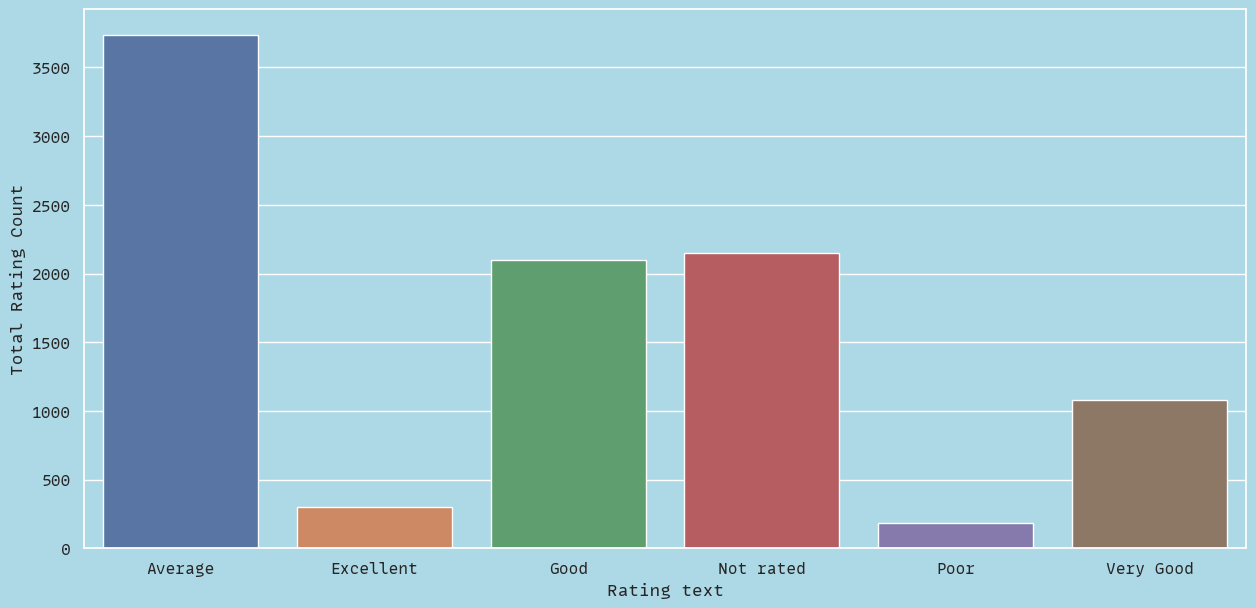

In [31]:
plt.figure(figsize=(15, 7))
sns.barplot(data=rating_types_count, x="Rating text", y="Total Rating Count")

In [36]:
explode = [
    0.07 if i == rating_types_count["Total Rating Count"].max() else 0
    for i in rating_types_count["Total Rating Count"]
]

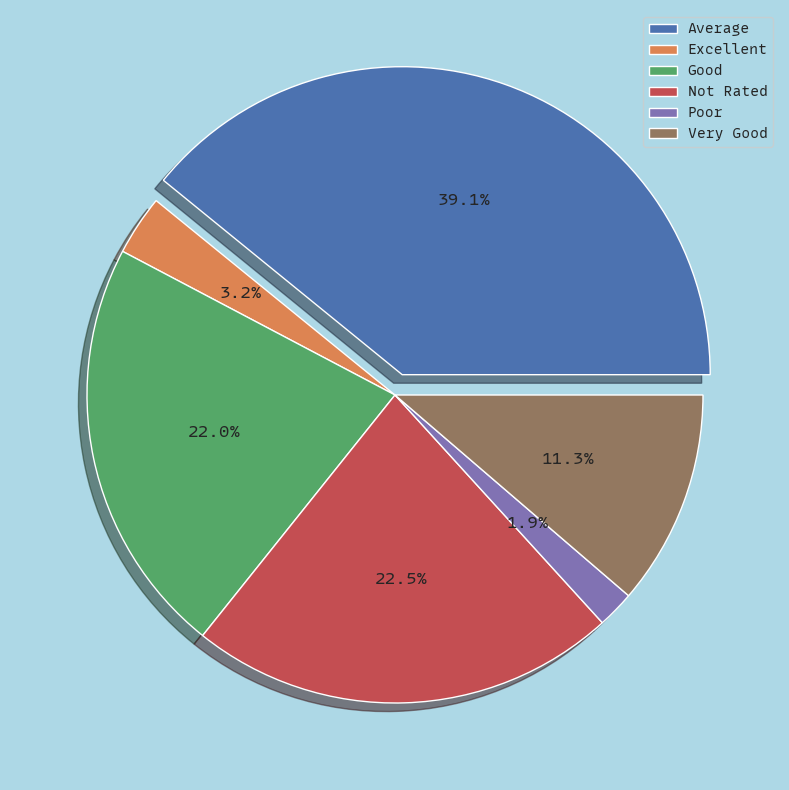

In [37]:
plt.figure(figsize=(17, 10))
labels = ["Average", "Excellent", "Good", "Not Rated", "Poor", "Very Good"]
plt.pie(
    x=rating_types_count["Total Rating Count"],
    autopct="%1.1f%%",
    shadow=True,
    explode=explode,
)
plt.legend(labels, loc="upper right", fontsize="small")
plt.show()

### **Conclusion Drawn**

#### i. Different rating color signifies different types of Rating text as shown below:

##### 1. White: Not rating

##### 2. Red: Poor rating

##### 3. Orange: Average rating

##### 4. Yellow: Good rating

##### 5. Green: Very Good

##### 6. Dark Green: Excellent

#### ii. Out of 9551 resturant listed zomato data set, 2148 has not got any reviews, 186 is poor rated, 3737 is Average and so on as shown in the above code output

#### iii. Almost 39.1 % of resturant is rated with average rating, 22.5 % is not rated and 22% is good , 11.3 % is good 3.2 % is Excellent and 1. 9% is poor


In [38]:
# Finding the countries name that haven't given any rating
final_df.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


In [39]:
no_rated_country_count = final_df[final_df["Rating text"] == "Not rated"]["Country"]
print(
    f"Countries where zero rating is provided: {no_rated_country_count.unique().tolist()}"
)
print(f"In total: {no_rated_country_count.shape} of times 0 rating is provided")
no_rated_country_count = no_rated_country_count.reset_index()
no_rated_country_count

Countries where zero rating is provided: ['Brazil', 'United States', 'India', 'United Kingdom']
In total: (2148,) of times 0 rating is provided


,index,Country
0,30,Brazil
1,58,Brazil
2,69,Brazil
3,77,Brazil
4,78,Brazil
...,...,...
2143,9109,India
2144,9110,India
2145,9111,India
2146,9112,India


In [40]:
"""Finding the frequency of countries """

frequency = no_rated_country_count["Country"].value_counts()
frequency = frequency.reset_index()
frequency

,Country,count
0,India,2139
1,Brazil,5
2,United States,3
3,United Kingdom,1


<Axes: xlabel='Country', ylabel='count'>

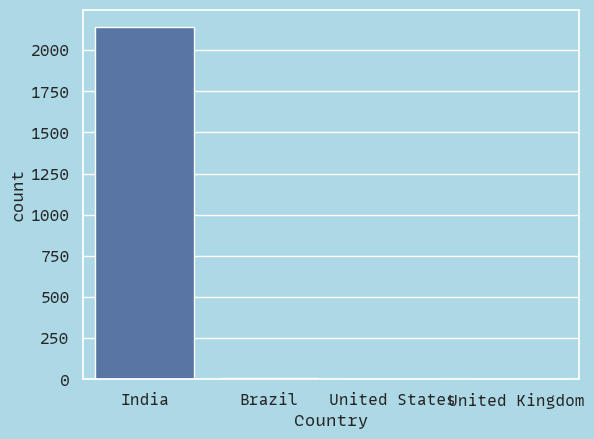

In [41]:
sns.barplot(data=frequency, x="Country", y="count")

### **Conclusion from Not rated country**

- India is the one which have the highest not rated records, from total not rated records.

- Out of total 2148 records, India have provided zero rating for 2139 times, and contribution of nations like Brazil, Unites States, United Kingdom is negligible.


# Finding out which currency is used by which country


In [42]:
final_df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

In [43]:
final_df["Currency"].unique()

array(['Botswana Pula(P)', 'Brazilian Real(R$)', 'Dollar($)',
       'Emirati Diram(AED)', 'Indian Rupees(Rs.)',
       'Indonesian Rupiah(IDR)', 'NewZealand($)', 'Pounds(ï¿½ï¿½)',
       'Qatari Rial(QR)', 'Rand(R)', 'Sri Lankan Rupee(LKR)',
       'Turkish Lira(TL)'], dtype=object)

In [44]:
final_df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,No,No,No,No,4,4.9,Dark Green,Excellent,365,Phillipines
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Yes,No,No,No,4,4.8,Dark Green,Excellent,229,Phillipines


In [50]:
final_df1 = final_df.copy()
countries_currency = final_df1.drop_duplicates(subset=["Currency", "Country"])[
    ["Country", "Currency"]
]
countries_currency

,Country,Currency
0,Phillipines,Botswana Pula(P)
22,Brazil,Brazilian Real(R$)
82,United States,Dollar($)
102,Australia,Dollar($)
185,Canada,Dollar($)
456,Singapore,Dollar($)
564,UAE,Emirati Diram(AED)
624,India,Indian Rupees(Rs.)
9276,Indonesia,Indonesian Rupiah(IDR)
9297,New Zealand,NewZealand($)


In [46]:
countries = final_df1["Country"].unique().shape
print(countries)
final_df1["Country"].unique()

(15,)


array(['Phillipines', 'Brazil', 'United States', 'Australia', 'Canada',
       'Singapore', 'UAE', 'India', 'Indonesia', 'New Zealand',
       'United Kingdom', 'Qatar', 'South Africa', 'Sri Lanka', 'Turkey'],
      dtype=object)